# Sentiment Analysis Of IMDB Movie Reviews Using NLP Model

This is a natural language processing model that tries to classify the sentiment of users based on their reviews on a movie or show.

The model here is trained on the data of the reviews by users on IMDB.

We have two sentiments here, 
1. pos - which is for a positive sentiment.
2. neg - which is for a negative sentiment.

In [1]:
#Importing the libraries required initially
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
reviews = pd.read_csv('train.csv')

In [3]:
reviews.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


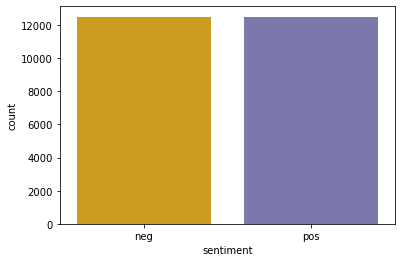

In [109]:
#Checking how many positive and negative reviews are there through seaborn's countplot
sns.countplot(x='sentiment',data=reviews, palette='Dark2_r')

In [4]:
reviews.describe()

,text,sentiment
count,25000,25000
unique,24904,2
top,You do realize that you've been watching the E...,pos
freq,3,12500


In [5]:
#checking how the data is as per the sentiment
reviews.groupby('sentiment').describe().transpose()

sentiment                                                  neg  \
text count                                               12500   
     unique                                              12432   
     top     You do realize that you've been watching the E...   
     freq                                                    3   

sentiment                                                  pos  
text count                                               12500  
     unique                                              12472  
     top     THE JIST: See something else.<br /><br />This ...  
     freq                                                    2

In [6]:
#taking the length of the sentences to check the length of the reviews
reviews['length'] = reviews['text'].apply(len)

In [7]:
reviews.head()

,text,sentiment,length
0,"Now, I won't deny that when I purchased this o...",neg,719
1,"The saddest thing about this ""tribute"" is that...",neg,1857
2,Last night I decided to watch the prequel or s...,neg,945
3,I have to admit that i liked the first half of...,neg,913
4,I was not impressed about this film especially...,neg,985


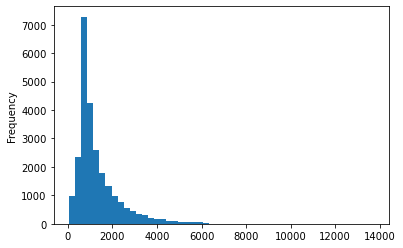

In [8]:
#visualizing it
reviews['length'].plot(kind = 'hist', bins = 50)

We can see here that most of the reviews are around the length of 1500 but there is only one which is huge which will be checked next.

In [9]:
reviews['length'].describe()

count    25000.00000
mean      1325.06964
std       1003.13367
min         52.00000
25%        702.00000
50%        979.00000
75%       1614.00000
max      13704.00000
Name: length, dtype: float64

In [10]:
# retrieving the review that is the longest
reviews[reviews['length'] == 13704]['text'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

Looks like the longest review was on WWE Pay Per View(PPV).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002510C1CB700>,
      dtype=object)

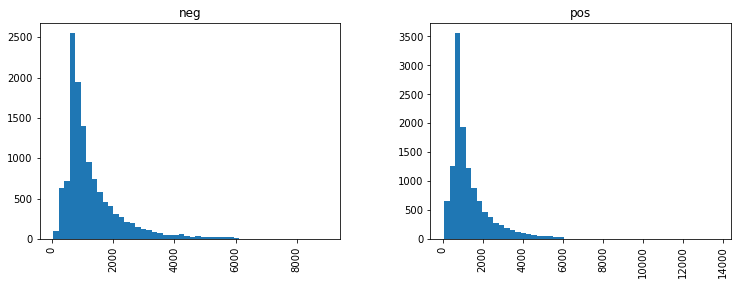

In [13]:
#length of the reviews by sentiment
reviews.hist(column = 'length', by = 'sentiment', bins=50, figsize=(12,4))

# Text Pre-Processing

In [14]:
import string

rev = 'Note : This is just a sample review of a movie!'

nopunc = [char for char in rev if char not in string.punctuation]

nopunc = ''.join(nopunc)

In [15]:
nopunc

'Note  This is just a sample review of a movie'

In [16]:
from nltk.corpus import stopwords

In [17]:
nopunc.split()

['Note', 'This', 'is', 'just', 'a', 'sample', 'review', 'of', 'a', 'movie']

In [18]:
clean_rev = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
clean_rev

['Note', 'sample', 'review', 'movie']

In [20]:
def text_process(rev):
    
    nopunc = [char for char in rev if char not in string.punctuation] #checking characters to see if there are any punctuations
    
    nopunc = ''.join(nopunc) # join the characters again to form a string
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] # remove stop words and return a
    #clean text
  

In [22]:
#checking if the function worked on a sample of the dataset
reviews['text'].head().apply(text_process)

0    [wont, deny, purchased, eBay, high, expectatio...
1    [saddest, thing, tribute, almost, singers, inc...
2    [Last, night, decided, watch, prequel, shall, ...
3    [admit, liked, first, half, Sleepers, looked, ...
4    [impressed, film, especially, fact, went, cine...
Name: text, dtype: object

In [23]:
reviews.head()

,text,sentiment,length
0,"Now, I won't deny that when I purchased this o...",neg,719
1,"The saddest thing about this ""tribute"" is that...",neg,1857
2,Last night I decided to watch the prequel or s...,neg,945
3,I have to admit that i liked the first half of...,neg,913
4,I was not impressed about this film especially...,neg,985


## Vectorization

Here, the transformation of reviews which are in a text format is first done by using a Bag of Words model.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(reviews['text'])

In [26]:
print(len(bow_transformer.vocabulary_))

142259


In [27]:
# checking if it worked
rev4 = reviews['text'][3]

In [28]:
bow4 = bow_transformer.transform([rev4])
print(bow4)
print(bow4.shape)

  (0, 1132)	1
  (0, 1755)	1
  (0, 4361)	1
  (0, 9102)	1
  (0, 9963)	1
  (0, 42381)	1
  (0, 50076)	1
  (0, 57560)	1
  (0, 60118)	1
  (0, 60258)	1
  (0, 60374)	1
  (0, 60819)	1
  (0, 61591)	1
  (0, 62413)	1
  (0, 62940)	1
  (0, 64515)	1
  (0, 66028)	1
  (0, 66278)	1
  (0, 67969)	4
  (0, 69369)	1
  (0, 70668)	1
  (0, 70947)	1
  (0, 71191)	1
  (0, 73008)	1
  (0, 74947)	1
  :	:
  (0, 105249)	1
  (0, 105420)	2
  (0, 105758)	1
  (0, 106041)	1
  (0, 106056)	1
  (0, 109255)	1
  (0, 110908)	1
  (0, 113133)	1
  (0, 114357)	1
  (0, 115150)	1
  (0, 119235)	1
  (0, 119714)	1
  (0, 120067)	1
  (0, 121733)	1
  (0, 124300)	1
  (0, 126672)	1
  (0, 127363)	1
  (0, 128577)	2
  (0, 129974)	1
  (0, 131553)	1
  (0, 135163)	2
  (0, 139188)	1
  (0, 140409)	1
  (0, 140534)	1
  (0, 141078)	1
(1, 142259)


In [29]:
reviews_bow = bow_transformer.transform(reviews['text'])

In [30]:
print('Shape of Sparse Matrix: ', reviews_bow.shape)

Shape of Sparse Matrix:  (25000, 142259)


### Weighting and Normalization Using TF-IDF

Term Frequency-Inverse Document Frequency's weight is used in information retrieval of key words. It tells how important a word is to a document in a corpus.

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
tfidf_transformer = TfidfTransformer().fit(reviews_bow)

In [33]:
reviews_tfidf = tfidf_transformer.transform(reviews_bow)
print(reviews_tfidf.shape)

(25000, 142259)


# Model Building and Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

In [35]:
rev_train, rev_test, sent_train, sent_test = \
train_test_split(reviews['text'], reviews['sentiment'], test_size=0.2)

print(len(rev_train), len(rev_test), len(rev_train) + len(rev_test))

20000 5000 25000


In [36]:
# Using Multinomial Naive Bayes Algorithm as it works better on text data compared to other algorithms
from sklearn.naive_bayes import MultinomialNB

Rather than going through all the above processes, we can also set up a pipeline that sets up all the transformations which is done to the data.

In [37]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # converting strings to token integer counts
    ('tfidf', TfidfTransformer()),  # converting these integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # training on TF-IDF vectors with Naive Bayes classifier
])

In [38]:
pipeline.fit(rev_train,sent_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002510F09E670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [39]:
predictions = pipeline.predict(rev_test)

# Model Evaluation

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(predictions,sent_test))

              precision    recall  f1-score   support

         neg       0.90      0.87      0.88      2568
         pos       0.86      0.89      0.88      2432

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



# Predicting On New Reviews

In [97]:
new_review = ['The movie was very bad and the screenplay was bad too.']

In [98]:
pipeline.predict(new_review)

array(['neg'], dtype='<U3')

In [58]:
new_review1 = ['The movie was good and the actors have done a brilliant job.']

In [59]:
pipeline.predict(new_review1)

array(['pos'], dtype='<U3')

The first review which is new_review was predicted to be negative and understandbly so as we see that the person reviewing uses the word bad in the review which is a negative sentiment and the word 'bad' has a lot of emphasis when it comes to predicting a negative sentiment.

Similarly, for the second review, new_review1, it is predicted as positive and in this, we see that the word 'good' as well as 'brilliant' have a lot of emphasis to be predicted as positive sentiment.

This importance for certain words is given when we use TF-IDF.

# Saving the Model

In [60]:
from joblib import dump,load

In [61]:
dump(pipeline, 'reviews.joblib')

['reviews.joblib']